In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
industry = 'Industrials'
encoder = 'lstm'
# encoder = 'patchTST'

In [4]:
path = '/content/drive/MyDrive/BTP_Minor/large/'

In [5]:
symbols = pd.read_csv(path + 'sp500.csv')
symbols

,Unnamed: 0,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
498,498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [6]:
not_included = ['CE','KVUE','VLTO','CEG','GEHC','PEAK','WBD']
symbols = symbols[~symbols['Symbol'].isin(not_included)]
symbols = symbols[symbols['GICS Sector'] == industry]
symbols = symbols.reset_index()
symbols

,index,Unnamed: 0,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,0,0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,1,1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,7,7,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
3,14,14,ALK,Alaska Air Group,Industrials,Passenger Airlines,"SeaTac, Washington",2016-05-13,766421,1985
4,18,18,ALLE,Allegion,Industrials,Building Products,"Dublin, Ireland",2013-12-02,1579241,1908
...,...,...,...,...,...,...,...,...,...,...
71,470,470,VRSK,Verisk,Industrials,Research & Consulting Services,"Jersey City, New Jersey",2015-10-08,1442145,1971
72,478,478,WAB,Wabtec,Industrials,Construction Machinery & Heavy Transportation ...,"Pittsburgh, Pennsylvania",2019-02-27,943452,1999 (1869)
73,482,482,WM,Waste Management,Industrials,Environmental & Facilities Services,"Houston, Texas",NaN,823768,1968
74,494,494,GWW,W. W. Grainger,Industrials,Industrial Machinery & Supplies & Components,"Lake Forest, Illinois",1981-06-30,277135,1927


In [7]:
pathx = '/content/drive/MyDrive/BTP_Major/large/'

Small Dataset Graph

In [8]:
# graph = pd.read_csv(path + 'graph.csv')
graph = pd.read_csv(pathx + 'graph_new.csv')
graph

,Unnamed: 0,ticker1,ticker2
0,0,PYPL,EBAY
1,1,HPE,HPQ
2,2,FOXA,NWSA
3,3,FOXA,NWS
4,4,FOX,NWSA
...,...,...,...
492,510,EBAY,MSFT
493,511,APTV,INTC
494,512,FOXA,DIS
495,513,FOX,DIS


In [9]:
# vertices = np.unique(graph[['ticker1', 'ticker2']])
vertices = symbols['Symbol']
mp = {}
cnt = 0
for symbol in vertices:
    mp[symbol] = cnt
    cnt = cnt + 1
mp

{'MMM': 0,
 'AOS': 1,
 'ADP': 2,
 'ALK': 3,
 'ALLE': 4,
 'AAL': 5,
 'AME': 6,
 'AXON': 7,
 'BA': 8,
 'BR': 9,
 'CHRW': 10,
 'CARR': 11,
 'CAT': 12,
 'CDAY': 13,
 'CTAS': 14,
 'CPRT': 15,
 'CSX': 16,
 'CMI': 17,
 'DE': 18,
 'DAL': 19,
 'DOV': 20,
 'ETN': 21,
 'EMR': 22,
 'EFX': 23,
 'EXPD': 24,
 'FAST': 25,
 'FDX': 26,
 'FTV': 27,
 'GNRC': 28,
 'GD': 29,
 'GE': 30,
 'HON': 31,
 'HWM': 32,
 'HUBB': 33,
 'HII': 34,
 'IEX': 35,
 'ITW': 36,
 'IR': 37,
 'JBHT': 38,
 'J': 39,
 'JCI': 40,
 'LHX': 41,
 'LDOS': 42,
 'LMT': 43,
 'MAS': 44,
 'NDSN': 45,
 'NSC': 46,
 'NOC': 47,
 'ODFL': 48,
 'OTIS': 49,
 'PCAR': 50,
 'PH': 51,
 'PAYX': 52,
 'PAYC': 53,
 'PNR': 54,
 'PWR': 55,
 'RTX': 56,
 'RSG': 57,
 'RHI': 58,
 'ROK': 59,
 'ROL': 60,
 'SNA': 61,
 'LUV': 62,
 'SWK': 63,
 'TXT': 64,
 'TT': 65,
 'TDG': 66,
 'UNP': 67,
 'UAL': 68,
 'UPS': 69,
 'URI': 70,
 'VRSK': 71,
 'WAB': 72,
 'WM': 73,
 'GWW': 74,
 'XYL': 75}

In [10]:
adj_matrix = np.zeros((len(vertices), len(vertices)), dtype=int)

for i in range (len(symbols['Symbol'])):
      adj_matrix[i, i] = 1

# adj_matrix
np.sum(adj_matrix)

76

In [11]:
for _, row in graph.iterrows():
    if mp.get(row['ticker1']) and mp.get(row['ticker2']):
      adj_matrix[mp.get(row['ticker1']), mp.get(row['ticker2'])] = 1
      adj_matrix[mp.get(row['ticker2']), mp.get(row['ticker1'])] = 1
    else:
      continue
      # print("X")

# print(adj_matrix)
np.sum(adj_matrix)

84

Feature Matrix for small Dataset (Price + Bert)

In [ ]:
if encoder == 'lstm':
  X_train = pd.read_pickle(path + 'merged_emb_price_finbert_train.pkl')
  X_val = pd.read_pickle(path + 'merged_emb_price_finbert_val.pkl')
  X_test = pd.read_pickle(path + 'merged_emb_price_finbert_test.pkl')
elif encoder == 'patchTST':
  X_train = pd.read_pickle(pathx + 'merged_emb_news_patchTST_train.pkl')
  X_val = pd.read_pickle(pathx + 'merged_emb_news_patchTST_val.pkl')
  X_test = pd.read_pickle(pathx + 'merged_emb_news_patchTST_test.pkl')

X_test

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.145...","[0.042461082339286804, 0.038639169186353683, 0...","[0.0, 1.0392998683883548e-09, 1.45768463966078...","[0.0058161490596830845, 0.0, 0.0, 0.0, 0.08671...","[0.07298146188259125, 0.08668927103281021, 0.0...","[0.0, 1.7992235479269425e-09, 0.04837703704833...","[0.09938174486160278, 0.0, 0.0, 0.062809221446...","[0.0, 0.0, 6.669894497823847e-11, 0.0887853056...","[0.0375230610370636, 0.07076463103294373, 0.08...","[0.0, 9.070136308686472e-11, 2.511302591301500...",...,"[0.0, 4.3950794392788595e-11, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.059659846127033234, 0.0, 0.036940...","[0.04479532316327095, 5.146508219588952e-10, 0...","[0.06566593796014786, 0.007726484443992376, 0....","[0.0, 3.8605743601927145e-10, 0.03741826489567...","[0.0, 0.09305493533611298, 0.0, 0.087896995246...","[0.0, 0.0, 0.13393162190914154, 3.128599046497...","[0.0, 1.6392934787390345e-09, 0.0, 0.160001397...","[0.0, 0.14799219369888306, 0.11449054628610611...","[0.0, 1.3202420268143555e-09, 0.0, 2.254462172..."
2023-07-05,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.146...","[0.041559070348739624, 0.03866373375058174, 0....","[0.0, 1.0938377981162262e-09, 1.61035518253527...","[0.005817520897835493, 0.0, 0.0, 0.0, 0.087235...","[0.07299784570932388, 0.08697503805160522, 0.0...","[0.0, 1.8757910780209386e-09, 0.04897871613502...","[0.09883292019367218, 0.0, 0.0, 0.061896041035...","[0.0, 0.0, 7.535803231428773e-11, 0.0874576643...","[0.039040181785821915, 0.0728088766336441, 0.0...","[0.0, 1.3403156362556956e-10, 1.77172823896398...",...,"[0.0, 1.464894872071909e-11, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.05753171443939209, 0.0, 0.0376316...","[0.044939689338207245, 5.006771663929044e-10, ...","[0.06785484403371811, 0.005624135956168175, 0....","[0.0, 2.933165377250191e-10, 0.038369867950677...","[0.0, 0.0916183814406395, 0.0, 0.0880110859870...","[0.0, 0.0, 0.13466046750545502, 3.455006281072...","[0.0, 1.6165201399687135e-09, 0.0, 0.155376210...","[0.0, 0.15299265086650848, 0.11686848849058151...","[0.0, 8.551979679971566e-10, 0.0, 1.6795011215..."
2023-07-06,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.143...","[0.03983333706855774, 0.038403239101171494, 0....","[0.0, 1.5188015289879786e-09, 2.22303642161136...","[0.005537434481084347, 0.0, 0.0, 0.0, 0.086170...","[0.0731530413031578, 0.08697342127561569, 0.0,...","[0.0, 1.6154115822786252e-09, 0.04920947179198...","[0.09867784380912781, 0.0, 0.0, 0.062172595411...","[0.0, 3.299896604858077e-07, 2.413528404909826...","[0.040487565100193024, 0.07460018247365952, 0....","[0.0, 2.9619912078615585e-10, 1.24995522128301...",...,"[0.0, 2.704327560498765e-11, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.056951552629470825, 0.0, 0.037665...","[0.04463579133152962, 8.092593262176706e-10, 0...","[0.06947264820337296, 0.004472832661122084, 0....","[0.0, 4.1010578266664766e-10, 0.03936133161187...","[0.0, 0.09093169122934341, 0.0, 0.087773121893...","[0.0, 0.0, 0.13474373519420624, 2.971079771096...","[0.0, 1.5044394618968226e-09, 0.0, 0.154731780...","[0.0, 0.15118391811847687, 0.116714708507061, ...","[0.0, 1.010006855928225e-09, 0.0, 1.1470466243..."
2023-07-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.140...","[0.03952088579535484, 0.037876714020967484, 0....","[0.0, 1.6425213411608297e-09, 2.40769537640517...","[0.0057040369138121605, 0.0, 0.0, 0.0, 0.08801...","[0.0730004832148552, 0.08692916482686996, 0.0,...","[0.0, 1.5372826345227963e-09, 0.04875282943248...","[0.09791159629821777, 0.0, 0.0, 0.061109181493...","[0.0, 7.527617640334938e-07, 6.866802265692584...","[0.038218531757593155, 0.07063646614551544, 0....","[0.0, 4.480194826239625e-10, 8.827608326100744...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.06705079227685928,...","[0.0, 0.0, 0.05578622967004776, 0.0, 0.0377741...","[0.04408545047044754, 8.957024566491611e-10, 0...","[0.06851701438426971, 0.006

In [ ]:
X_train = X_train[vertices]
X_test = X_test[vertices]
X_val = X_val[vertices]
X_train.head()

,MMM,AOS,ADP,ALK,ALLE,AAL,AME,AXON,BA,BR,...,TDG,UNP,UAL,UPS,URI,VRSK,WAB,WM,GWW,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.139...","[0.038768257945775986, 0.03525826707482338, 0....","[0.0, 2.5950264443963533e-06, 4.57595801528487...","[0.1479765921831131, 0.18474912643432617, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.09823707491159439,...","[0.0, 0.0, 0.059791047126054764, 0.03600659221...","[0.06432720273733139, 0.1347774714231491, 0.0,...","[0.10711905360221863, 0.07515711337327957, 0.0...","[0.0, 0.0, 0.10102756321430206, 0.0, 2.0302086...","[0.0, 0.03381900489330292, 0.02913304977118969...",...,"[1.0144648454613048e-09, 2.664946263664092e-09...","[4.89926224589432e-11, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.17033272981643677, 0.0, 1.5696262345432643e...","[0.0, 0.2928304970264435, 0.128867506980896, 0...","[0.0, 0.06780605763196945, 0.10678493231534958...","[0.0, 0.014014782384037971, 0.0620690882205963...","[0.006865150760859251, 0.024520985782146454, 0...","[0.0, 0.15767671167850494, 0.0, 0.0, 0.1461229...","[4.502371666603722e-06, 0.0, 0.055584285408258...","[0.0, 3.612536936259403e-10, 0.037201363593339..."
2022-03-02,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.136...","[0.03674417361617088, 0.035279203206300735, 0....","[0.0, 1.8859038846130716e-06, 7.56009144176061...","[0.1381853073835373, 0.16994573175907135, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.09855590760707855,...","[0.0, 0.0, 0.06006040424108505, 0.036169979721...","[0.056250814348459244, 0.12998495995998383, 0....","[0.10770788043737411, 0.0747152715921402, 0.0,...","[0.0, 0.0, 0.09624344110488892, 0.0, 3.4787844...","[0.0, 0.034187525510787964, 0.0293448083102703...",...,"[1.025775353546976e-09, 2.194076698103231e-09,...","[1.9856354060987513e-10, 0.0, 0.0, 0.0, 0.0, 0...","[0.16428956389427185, 0.0, 2.8864066692335655e...","[0.0, 0.2879624366760254, 0.12481995671987534,...","[0.0, 0.06135692074894905, 0.10214290767908096...","[0.0, 0.01359119825065136, 0.06287979334592819...","[0.010844063945114613, 0.02815892919898033, 0....","[2.2217555573078585e-10, 0.16160492599010468, ...","[3.245930201956071e-06, 0.0, 0.052532821893692...","[0.0, 4.581692802929638e-10, 0.038876343518495..."
2022-03-03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.140...","[0.041115645319223404, 0.03515780717134476, 0....","[0.0, 1.3743918998443405e-06, 1.08047522318077...","[0.1384594589471817, 0.17620018124580383, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.10082685947418213,...","[0.0, 0.0, 0.059329789131879807, 0.03576425090...","[0.06907068938016891, 0.13998514413833618, 0.0...","[0.10804367065429688, 0.07489044219255447, 0.0...","[0.0, 0.0, 0.09877566993236542, 0.0, 3.9774794...","[0.0, 0.03324510529637337, 0.02867613360285759...",...,"[9.019490154749121e-10, 2.1509334313662976e-09...","[3.5077291071772265e-10, 0.0, 0.0, 6.850484068...","[0.1651381403207779, 0.0, 2.6127403018882944e-...","[0.0, 0.2953740060329437, 0.1304924339056015, ...","[0.0, 0.07003281265497208, 0.10885424166917801...","[0.0, 0.013199438340961933, 0.0640782788395881...","[0.008057160302996635, 0.021806523203849792, 0...","[2.352861239174331e-10, 0.16680024564266205, 0...","[2.300028654644848e-06, 0.0, 0.056986477226018...","[0.0, 4.5147013905122435e-10, 0.03661976754665..."
2022-03-04,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.141...","[0.039985910058021545, 0.03590487688779831, 0....","[0.0, 9.981589528251789e-07, 1.480709027612547...","[0.1374182403087616, 0.17228595912456512, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.10166233777999878,...","[0.0, 0.0, 0.0589933916926384, 0.0358322635293...","[0.06638403981924057, 0.13883842527866364, 0.0...","[0.10504700988531113, 0.07147800922393799, 0.0...","[0.0, 0.0, 0.09473311901092529, 0.0, 2.1340272...","[0.0, 0.03561796620488167, 0.03032337315380573...",...,"[5.045300288664123e-10, 1.6753749498832349e-09...","[3.1278629686326553e-10, 0.0, 0.0, 2.737530861...","[0.16195785999298096, 0.0, 1.5279848220028924e...","[0.0, 0.2968834936618805, 0.1312

In [ ]:
y_train = pd.read_pickle(path + 'y_train.pkl')
y_val = pd.read_pickle(path + 'y_val.pkl')
y_test = pd.read_pickle(path + 'y_test.pkl')
y_train

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,0,0,0,1,1,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2022-03-02,1,2,1,1,2,2,1,1,2,2,...,2,2,2,1,1,1,2,1,2,1
2022-03-03,1,1,1,1,1,2,0,1,1,1,...,1,1,0,2,1,1,1,1,1,1
2022-03-04,1,1,1,1,1,1,1,1,1,1,...,1,1,0,2,0,1,0,1,0,1
2022-03-07,0,1,0,1,0,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2023-04-25,1,1,1,1,0,0,0,1,1,1,...,1,1,0,1,1,1,1,1,0,1
2023-04-26,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1


In [ ]:
y_train = y_train[vertices]
y_test = y_test[vertices]
y_val = y_val[vertices]
y_val.head()

,MMM,AOS,ADP,ALK,ALLE,AAL,AME,AXON,BA,BR,...,TDG,UNP,UAL,UPS,URI,VRSK,WAB,WM,GWW,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,1,2,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-05-02,0,1,0,1,1,1,2,1,1,2,...,1,1,1,0,1,1,1,1,1,1
2023-05-03,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1
2023-05-04,1,1,1,0,1,0,1,1,1,1,...,1,1,0,1,0,1,1,1,0,2
2023-05-05,1,1,1,2,1,2,1,1,1,1,...,1,2,2,1,2,2,1,1,1,2


In [ ]:
# Convert tensors in DataFrame columns to a list
tensor_list = [tf.concat([X_train[col][i] for col in X_train.columns], axis=0) for i in range(len(X_train))]

# Stack tensors from the list horizontally to create a single tensor
concatenated_tensor = tf.stack(tensor_list, axis=0)

x_train_tensor = tf.reshape(concatenated_tensor, (concatenated_tensor.shape[0], len(X_train.columns), -1))

In [ ]:
# Convert tensors in DataFrame columns to a list
tensor_list = [tf.concat([X_val[col][i] for col in X_val.columns], axis=0) for i in range(len(X_val))]

# Stack tensors from the list horizontally to create a single tensor
concatenated_tensor = tf.stack(tensor_list, axis=0)

x_val_tensor = tf.reshape(concatenated_tensor, (concatenated_tensor.shape[0], len(X_val.columns), -1))

In [ ]:
# Convert tensors in DataFrame columns to a list
tensor_list = [tf.concat([X_test[col][i] for col in X_test.columns], axis=0) for i in range(len(X_test))]

# Stack tensors from the list horizontally to create a single tensor
concatenated_tensor = tf.stack(tensor_list, axis=0)

x_test_tensor = tf.reshape(concatenated_tensor, (concatenated_tensor.shape[0], len(X_test.columns), -1))

In [ ]:
# Convert tensors in DataFrame columns to a list
y_matrix = [[y_train[col][i] for col in y_train.columns] for i in range(len(y_train))]

depth = 3
y_train_one = tf.one_hot(y_matrix, depth)
# y_train_one

In [ ]:
# Convert tensors in DataFrame columns to a list
y_matrix = [[y_val[col][i] for col in y_val.columns] for i in range(len(y_val))]

depth = 3
y_val_one = tf.one_hot(y_matrix, depth)
# y_val_one

In [ ]:
# Convert tensors in DataFrame columns to a list
y_matrix = [[y_test[col][i] for col in y_test.columns] for i in range(len(y_test))]

depth = 3
y_test_one = tf.one_hot(y_matrix, depth)
# y_test_one

In [ ]:
# # Place the tensor on GPU if available
# if tf.config.experimental.list_physical_devices('GPU'):
#     with tf.device('/GPU:0'):
#         x_train_tensor_on_gpu = x_train_tensor
#         x_test_tensor_on_gpu = x_test_tensor
#         x_val_tensor_on_gpu = x_val_tensor
# else:
#     print("No GPU available, tensor will be placed on CPU.")


In [ ]:
# # Place the tensor on GPU if available
# if tf.config.experimental.list_physical_devices('GPU'):
#     with tf.device('/GPU:0'):
#         y_train_one_on_gpu = y_train_one
#         y_test_one_on_gpu = y_test_one
#         y_val_one_on_gpu = y_val_one
# else:
#     print("No GPU available, tensor will be placed on CPU.")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU

In [ ]:
class SGATLayer2(tf.keras.layers.Layer):
    def __init__(self, output_dim, g):
        super(SGATLayer2, self).__init__()
        self.output_dim = output_dim
        self.fc = Dense(self.output_dim)
        self.adj = g

    def call(self, x, a_list, training=False):
        h = self.fc(x)
        i=0
        for batch in h:
          a = a_list.read(i)
          batch = a * batch
          i += 1

        output = h
        return output

In [ ]:
class SGATLayer3(tf.keras.layers.Layer):
    def __init__(self, output_dim, num_layers, g):
        super(SGATLayer3, self).__init__()
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.adj = g
        self.fc = Dense(self.output_dim)
        self.dense_l = Dense(1)
        self.dense_r = Dense(1)
        #Constants
        self.gamma = -0.1
        self.zeta = 1.1
        self.beta = 0.66
        self.eps = 1e-20
        self.const1 = self.beta*tf.math.log(-self.gamma/self.zeta + self.eps)
        self.layers = []
        for _ in range(1, self.num_layers):
          self.layers.append(SGATLayer2(output_dim=self.output_dim, g=self.adj))


    def call(self, x, training=False):
        h = self.fc(x)
        num_nodes = x.shape[1]

        a_list = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
        a_unnorm = tf.TensorArray(tf.float32, size=0, dynamic_size=True)

        i=0

        for batch in h:

          a1 = self.dense_l(batch)   #(N, H, 1)
          a2 = self.dense_r(batch)   #(N, H, 1)

          #0. Create a 2D matrix/tensor of same dimensions as adj
          # a = [ [tf.zeros([1])]*num_nodes for _ in range(num_nodes)]

          # 1. compute edge attention
          # a = self.edge_attention (a1, a2, self.adj, num_nodes, a, training)
          a = self.edge_attention (a1, a2, self.adj, num_nodes, training)

          a_unnorm = a_unnorm.write(i, a)

          # 2. compute softmax
          a = self.loop (num_nodes, a)
          # self.edge_softmax() ################ TO BE DONE (if reqd)

          a = tf.reshape (a, [num_nodes, num_nodes, 1])  # required for updated functions only

          a = self.norm (num_nodes, a)

          a_list = a_list.write(i, a)
          i+=1

          batch = a * batch

        # a = a_list.stack()
        a_unnorm = a_unnorm.stack()
        batchSize = tf.cast(tf.shape(x)[0], tf.float32)

        output = h
        for i in range (1, self.num_layers):
          output = self.layers[i-1] (output, a_list)

        self.add_loss(0.1 * tf.math.reduce_sum(self.get_loss2(a_unnorm)) / (batchSize * num_nodes * num_nodes))
        return output

    @tf.function
    def l0_train(self, logAlpha, min, max):
        random_tensor = tf.random.uniform(tf.shape(logAlpha), dtype=logAlpha.dtype)
        U = random_tensor + self.eps
        s = tf.math.sigmoid((tf.math.log(U / (1 - U)) + logAlpha) / self.beta)
        s_bar = s * (self.zeta - self.gamma) + self.gamma
        mask = tf.clip_by_value(s_bar, min, max)
        return mask

    @tf.function
    def l0_test(self, logAlpha, min, max):
        s = tf.math.sigmoid(logAlpha/self.beta)
        s_bar = s * (self.zeta - self.gamma) + self.gamma
        mask = tf.clip_by_value(s_bar, min, max)
        return mask

    @tf.function
    def get_loss2(self, logAlpha):
      return tf.math.sigmoid(logAlpha - self.const1)

    @tf.function
    def edge_attention(self, a1, a2, adj, num_nodes, training):
        # a = [ [tf.zeros([1])]*num_nodes for _ in range(num_nodes)]
        # for i in range (num_nodes):
        #   for j in range (num_nodes):
        #     if adj[i][j] == 1:
        #       #edge is present
        #       logits = a1[i] + a2[j]
        #       if training:
        #         m = self.l0_train(logits, 0, 1)
        #       else:
        #         m = self.l0_test(logits, 0, 1)
        #       a[i][j] = m

        # a = tf.convert_to_tensor(a) #shape (N, N, 1)
        # return a
        a11 = tf.tile(a1, [1, num_nodes])
        a21 = tf.tile(tf.transpose(a2), [num_nodes, 1])
        a0 = tf.math.multiply(tf.cast(adj, tf.float32) , (a11 + a21))
        # a0 = tf.reshape(a0, [num_nodes, num_nodes,1])
        if training:
          a0 = self.l0_train(a0, 0, 1)
        else:
          a0 = self.l0_test(a0, 0, 1)
        # print(tf.reshape(tf.transpose(a0), [num_nodes, num_nodes,1]), a)
        # tf.print (tf.math.equal(a0, tf.reshape(a, [num_nodes, num_nodes])))
        return a0 #shape (N, N)

    @tf.function
    def loop(self, num_nodes, a_list):
        # a = tf.unstack(a_list)
        # a = [tf.unstack (tensor) for tensor in a]
        # for i in range (num_nodes):
        #   a[i][i] = tf.ones([1])
        # return tf.convert_to_tensor(a)
        return tf.linalg.set_diag(a_list, tf.ones(tf.shape(a_list)[:-1], dtype=a_list.dtype))


    @tf.function
    def norm(self, num_nodes, a_list):
        a = tf.unstack(a_list)
        a = [tf.unstack (tensor) for tensor in a]

        for node in range (num_nodes):
          sum = 0

          for src in range (num_nodes):
            sum += a[src][node]

          for src in range (num_nodes):
            a[src][node] /= sum

        return tf.convert_to_tensor(a)

In [ ]:
# model = tf.keras.Sequential([
#   MultiLayerSGATLayer(output_dim=256, num_layers = 8, adj=adj_matrix),
#   tf.keras.layers.Dense(3, activation='softmax')
# ])

model = tf.keras.Sequential([
  SGATLayer3(output_dim=256, num_layers = 8, g=adj_matrix),
  tf.keras.layers.Dense(3, activation='softmax')
])

metrics = [
    'accuracy',
    # tf.keras.metrics.SparseCategoricalCrossentropy(),
    'mse',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
    ]

opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
loss = 'mse'
model.compile(loss=loss, optimizer=opt, metrics=metrics)

In [ ]:
# tf.debugging.set_log_device_placement(True)

In [ ]:
%%time
# callback
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
csv_logger = tf.keras.callbacks.CSVLogger(f'./logs/{encoder}_{industry}_training.log')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f"./logs/{encoder}_{industry}")
callback = [early, csv_logger, tensorboard_callback]

CPU times: user 2.82 ms, sys: 123 µs, total: 2.95 ms
Wall time: 4.37 ms


In [ ]:
# Train model
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
# history = model.fit(x_train_tensor, y_train_one, validation_data=(x_val_tensor, y_val_one), epochs=200, batch_size=32, callbacks=[callback])
%%time
history = model.fit(x_train_tensor, y_train_one, validation_data=(x_val_tensor, y_val_one), epochs=200, batch_size=32, callbacks=callback)
# history = model.fit(x_train_tensor_on_gpu, y_train_one_on_gpu, validation_data=(x_val_tensor_on_gpu, y_val_one_on_gpu), epochs=200, batch_size=32, callbacks=callback)

Layer SGATLayer3 was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/200
10/10 [==============================] - 420s 6s/step - loss: 0.4257 - accuracy: 0.1453 - mse: 0.3374 - precision: 0.1391 - recall: 0.1345 - val_loss: 0.4359 - val_accuracy: 0.0820 - val_mse: 0.3471 - val_precision: 0.0747 - val_recall: 0.0719
Epoch 2/200
10/10 [==============================] - 39s 4s/step - loss: 0.4086 - accuracy: 0.1483 - mse: 0.3203 - precision: 0.1383 - recall: 0.1209 - val_loss: 0.4166 - val_accuracy: 0.0860 - val_mse: 0.3278 - val_precision: 0.0865 - val_recall: 0.0435
Epoch 3/200
10/10 [==============================] - 39s 4s/step - loss: 0.3926 - accuracy: 0.1514 - mse: 0.3043 - precision: 0.1750 - recall: 0.0423 - val_loss: 0.3975 - val_accuracy: 0.0909 - val_mse: 0.3087 - val_precision: 0.1830 - val_recall: 0.0337
Epoch 4/200
10/10 [==============================] - 40s 4s/step - loss: 0.3767 - accuracy: 0.1570 - mse: 0.2884 - precision: 0.2320 - recall: 0.0359 - val_loss: 0.3777 - val_accuracy: 0.0952 - val_mse: 0.2888 - val_precision: 0.2073 

In [ ]:
import matplotlib.pyplot as plt

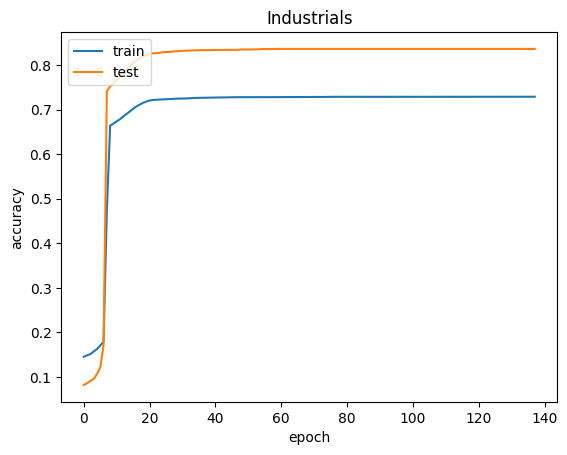

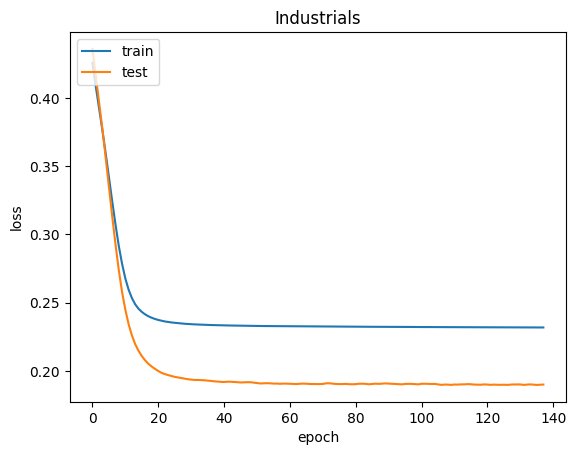

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'{industry}')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig(f"{model}_{industry}_accuracy.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'{industry}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig(f"{model}_{industry}_loss.png")
plt.show()

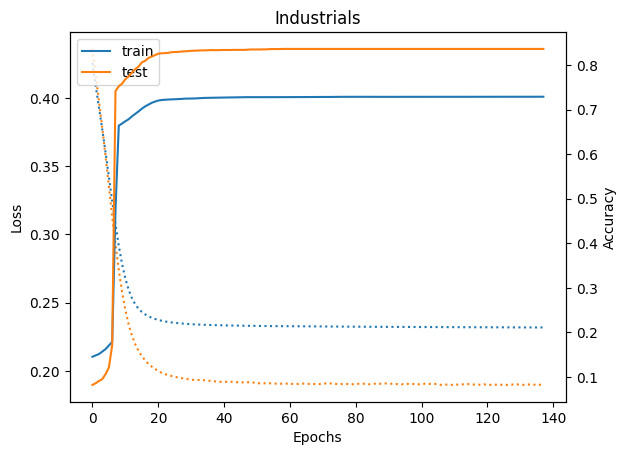

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plotting loss on primary y-axis
ax1.plot(history.history['loss'], label='train', ls = ':')
ax1.plot(history.history['val_loss'], label='test', ls = ':')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.tick_params('y')

# Creating a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='test')
ax2.set_ylabel('Accuracy')
ax2.tick_params('y')

# Show legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines2 + lines1
labels = labels2
ax1.legend(lines, labels, loc='upper left')

plt.title(f'{industry}')
# plt.savefig(f"{industry}_acc_loss.png")
plt.show()

In [ ]:
%%time
# Evaluate model
y_pred = model.predict(x_test_tensor)
accuracy = tf.reduce_mean(tf.cast(tf.argmax(y_pred, axis=2) == tf.argmax(y_test_one, axis=2), tf.float32))
print('Accuracy:', accuracy.numpy())
# Accuracy: 0.7952941
# Accuracy: 0.81058824

3/3 [==============================] - 15s 368ms/step
Accuracy: 0.86470586
CPU times: user 15.9 s, sys: 44.7 ms, total: 15.9 s
Wall time: 14.9 s


In [ ]:
# Convert y_pred and y_test_one to categorical labels
y_pred_labels = tf.argmax(y_pred, axis=2)
y_true_labels = tf.argmax(y_test_one, axis=2)

# Calculate evaluation metrics
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true_labels, y_pred_labels), tf.float32))

precision = tf.keras.metrics.Precision()
precision.update_state(y_true_labels, y_pred_labels)
precision_result = precision.result().numpy()

recall = tf.keras.metrics.Recall()
recall.update_state(y_true_labels, y_pred_labels)
recall_result = recall.result().numpy()

f1 = 2 * ((precision_result * recall_result) / (precision_result + recall_result + 1e-7))

# Print or use the calculated metrics
print(f"Accuracy: {accuracy.numpy()}")
print(f"Precision: {precision_result}")
print(f"Recall: {recall_result}")
print(f"F1 Score: {f1}")

Accuracy: 0.8647058606147766
Precision: 0.9220638275146484
Recall: 0.9989928007125854
F1 Score: 0.9589879507560755


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sgat_layer3 (SGATLayer3)    (None, 76, 256)           690690    
                                                                 
 dense_10 (Dense)            (None, 76, 3)             771       
                                                                 
Total params: 691461 (2.64 MB)
Trainable params: 691461 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# !zip -r sgat.zip /kaggle/working

In [ ]:
# from IPython.display import FileLink
# FileLink(r'sgat.zip')

In [ ]:
# import os
# os.remove("/kaggle/working/sgat.zip")

In [ ]:
# !ls

In [ ]:
y_true_labels.shape[0]

85

In [ ]:
tf.reduce_sum(tf.cast(y_pred_labels == 2, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=39.0>

In [ ]:
tf.reduce_sum(tf.cast(y_pred_labels == 2, tf.float32))/y_true_labels.shape[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.45882353>

In [ ]:
vertices

0      MMM
1      AOS
2      ADP
3      ALK
4     ALLE
      ... 
71    VRSK
72     WAB
73      WM
74     GWW
75     XYL
Name: Symbol, Length: 76, dtype: object

In [ ]:
y_pred_label = tf.argmax(y_pred, axis=2)
y_pred_label_df = pd.DataFrame(y_pred_label.numpy())
y_pred_label_df.rename(columns = vertices,inplace=True)
y_pred_label_df['Date'] = y_test.index
y_pred_label_df.set_index('Date', inplace = True)
y_pred_label_df

,MMM,AOS,ADP,ALK,ALLE,AAL,AME,AXON,BA,BR,...,TDG,UNP,UAL,UPS,URI,VRSK,WAB,WM,GWW,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-03,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-07-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-07-06,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-07-07,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-07-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
2023-10-26,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-10-27,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
y_pred_label_df.to_csv(pathx + f'y_pred/{encoder}_{industry}.csv')

In [ ]:
y_pred_label

<tf.Tensor: shape=(85, 76), dtype=int64, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>

In [ ]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [ ]:
!zip -r  ./logs.zip ./logs

updating: logs/ (stored 0%)
updating: logs/patchTST_Industrials_training.log (deflated 61%)
updating: logs/patchTST_Industrials/ (stored 0%)
updating: logs/patchTST_Industrials/train/ (stored 0%)
updating: logs/patchTST_Industrials/train/events.out.tfevents.1714042350.0720cb48957b.1090.0.v2 (deflated 95%)
updating: logs/patchTST_Industrials/validation/ (stored 0%)
updating: logs/patchTST_Industrials/validation/events.out.tfevents.1714042742.0720cb48957b.1090.1.v2 (deflated 80%)
  adding: logs/lstm_Industrials/ (stored 0%)
  adding: logs/lstm_Industrials/train/ (stored 0%)
  adding: logs/lstm_Industrials/train/events.out.tfevents.1714049631.0720cb48957b.31283.0.v2 (deflated 95%)
  adding: logs/lstm_Industrials/validation/ (stored 0%)
  adding: logs/lstm_Industrials/validation/events.out.tfevents.1714050037.0720cb48957b.31283.1.v2 (deflated 81%)
  adding: logs/lstm_Industrials_training.log (deflated 66%)
